In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
feargreed = pd.read_csv("/fear_greed_index.csv")
historical = pd.read_csv("/historical_data.csv")

In [25]:
feargreed['date'] = pd.to_datetime(feargreed['date'], errors='coerce')
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce')

In [26]:
historical['date'] = historical['Timestamp IST'].dt.date
feargreed['date'] = feargreed['date'].dt.date

In [36]:
daily_trades = historical.groupby('date').agg({
    'Size USD': 'sum',
    'Execution Price': 'mean',
    'Closed PnL': 'sum',
    'Fee': 'sum'
}).reset_index()

In [29]:
merged = pd.merge(daily_trades, feargreed[['date','value','classification']], on='date', how='inner')

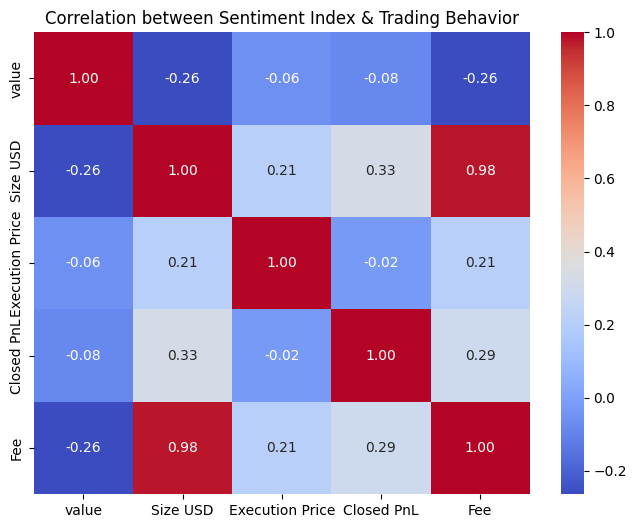

In [30]:
corr = merged[['value','Size USD','Execution Price','Closed PnL','Fee']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Sentiment Index & Trading Behavior")
plt.show()

/tmp/ipython-input-1788080621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=merged, palette="Set2")


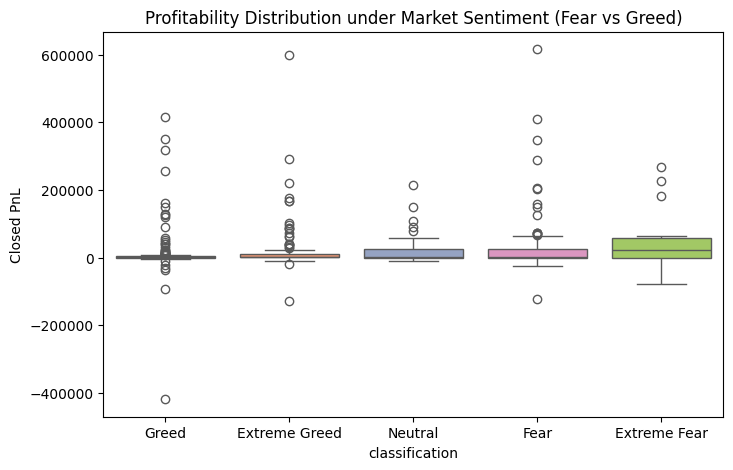

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=merged, palette="Set2")
plt.title("Profitability Distribution under Market Sentiment (Fear vs Greed)")
plt.show()

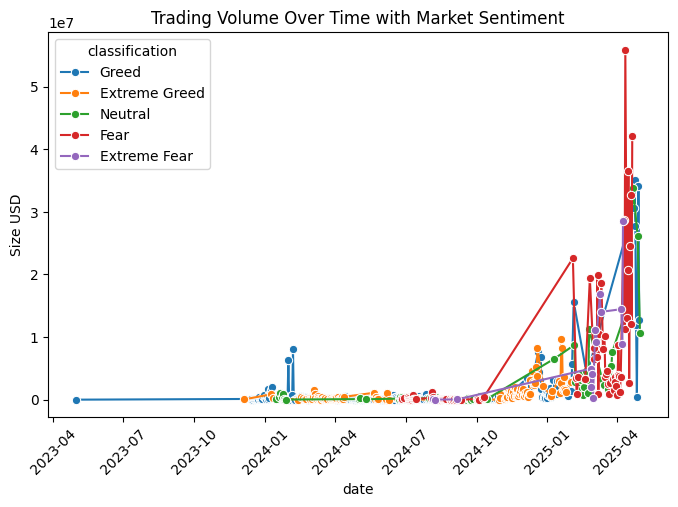

In [32]:
plt.figure(figsize=(8,5))
sns.lineplot(x='date', y='Size USD', hue='classification', data=merged, marker="o")
plt.xticks(rotation=45)
plt.title("Trading Volume Over Time with Market Sentiment")
plt.show()

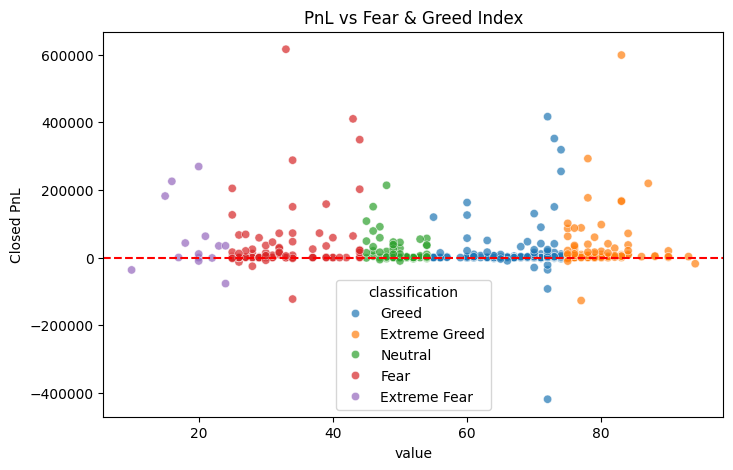

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='value', y='Closed PnL', hue='classification', data=merged, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("PnL vs Fear & Greed Index")
plt.show()

In [34]:
trend_analysis = merged.groupby('classification').agg({
    'Closed PnL':'mean',
    'Size USD':'mean',
    'Execution Price':'mean'
})

print("\nHidden Signals from Analysis:")
print(trend_analysis)


Hidden Signals from Analysis:
                  Closed PnL      Size USD  Execution Price
classification                                             
Extreme Fear    52793.589178  8.177447e+06      5697.303079
Extreme Greed   23817.292199  1.091800e+06      7069.526489
Fear            36891.818040  5.311261e+06     12050.374634
Greed           11140.566181  1.495246e+06     12301.642333
Neutral         19297.323516  2.690180e+06     18440.275907
